___
# Quiz de Data Science

Objetivo: Revisar algumas ferramentas básicas de Ciência de Dados:

    -Ler os dados
    -Informações básicas sobre os dados
    -Análise exploratória básica
    -Dividir os dados em treino e teste
    -Carregar e treinar um modelo (Regressão Logística) do sklearn
    -Fazer a previsão com a métrica de avaliação escolhida 

Problema: Prever se um usuário irá clicar num anúncio de internet

Os dados possuem a seguintes informações:

* 'Daily Time Spent on Site': tempo do consumidor on site em minutos
* 'Age': idade do consumidor 
* 'Area Income': renda média do consumidor por localização geográfica
* 'Daily Internet Usage': tempo médio que o consumidor passa na internet em minutos
* 'Ad Topic Line': título do anúncio
* 'City': cidade do consumidor
* 'Male': o consumidor é do sexo masculino ou não
* 'Country': país do consumidor
* 'Timestamp': hora que o consumidor clicou no anúnciou ou fechou a janela de navegação
* 'Clicked on Ad': variável resposta: 1 se o consumidor clicou, 0 se não clicou no anúncio

Conforme necessidade, importe as bibliotecas necessárias

## Importe os dados:
Importe o arquivo advertising.csv e as bibliotecas pandas e numpy

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/advertising.csv')

Verifique o header desses dados

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Utilize as funções que mostram a informação sobre o tipo de colunas e as estatísticas básicas desses dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Verifique a quantidade de nulos por variável

In [ ]:
df[df.isnull()].sum()

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

Calcule o valor de 'Country' que possue o valor de 'Area Income' máximo 

In [ ]:
df.sort_values(by='Area Income', ascending=False).iloc[0]

Daily Time Spent on Site                               64.51
Age                                                       42
Area Income                                          79484.8
Daily Internet Usage                                  190.71
Ad Topic Line               Virtual 5thgeneration neural-net
City                                             Edwardmouth
Male                                                       1
Country                                           Madagascar
Timestamp                                2016-04-29 07:49:01
Clicked on Ad                                              0
Name: 568, dtype: object

Utilize uma função que calcula a média das variáveis ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] agrupadas pela variável resposta Clicked on Ad

In [ ]:
df.groupby('Clicked on Ad').mean()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
Clicked on Ad,,,,,
0,76.85462,31.684,61385.58642,214.51374,0.500
1,53.14578,40.334,48614.41374,145.48646,0.462


Utilize uma função que calcula a média das variáveis ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] agrupadas pela variável resposta Clicked on Ad para o valor de Country que possue a Area Income mais alta 

In [ ]:
df[df.Country == 'Madagascar'].groupby('Clicked on Ad').mean()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
Clicked on Ad,,,,,
0,78.270,33.25,63243.03,209.7175,0.5
1,65.255,49.00,40162.55,156.9150,0.0


## Exploração de dados com seaborn/matplotlib (escolha uma, ou as duas :) )

Importe e plot um histograma da varável 'Age' com seaborn

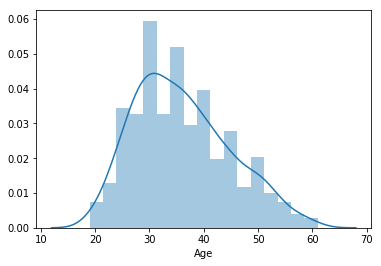

importe matplotlib.pyplot e plot um histograma da varável 'Age' com matplotlib

(array([ 50., 118., 195., 159., 153., 138.,  77.,  65.,  28.,  17.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. , 44.2, 48.4, 52.6, 56.8, 61. ]),
 <a list of 10 Patch objects>)

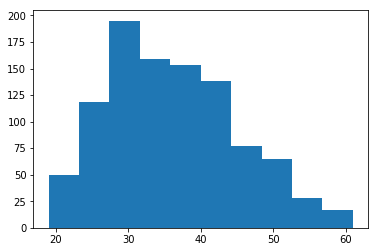

Plot um histograma da varável Age segmentado por 'Clicked on Ad' com seaborn

dicas: use loc, label, importe matplotlib.pyplot como plt e use plt.legend()

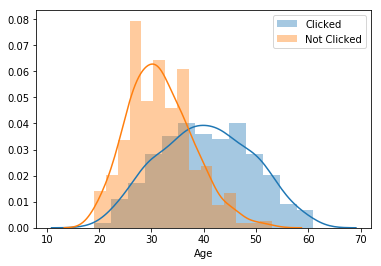

Plot um histograma da varável Age segmentado por 'Clicked on Ad' com matplotlib

dicas: use loc, label, importe matplotlib.pyplot como plt e use plt.legend() e alpha = 0.5

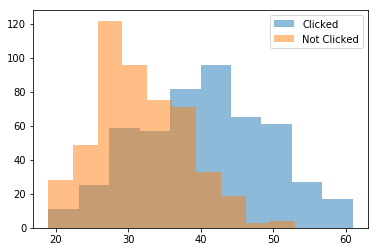

Plote o mapa de calor da correlação entre as variáveis (Seaborn)

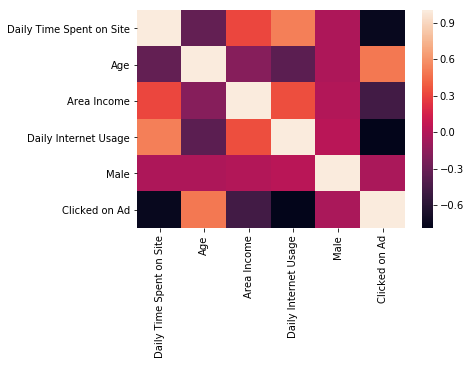

# Aplicando a Regressão Logística

Primeiramente, defina o dataset de modelagem e a variável resposta

Lista de variáveis usadas para modelar

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']

Importe o train_test_split e aplique-o

C:\Users\heito\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Importe e treine a regressão Logística do sklearn

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predições

Faça a previsão no dataset de test

Importe e exiba o classification report deste modelo:

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       126
          1       0.93      0.83      0.88       124

avg / total       0.89      0.88      0.88       250

